Phi angle range:  nan nan
Psi angle range:  nan nan


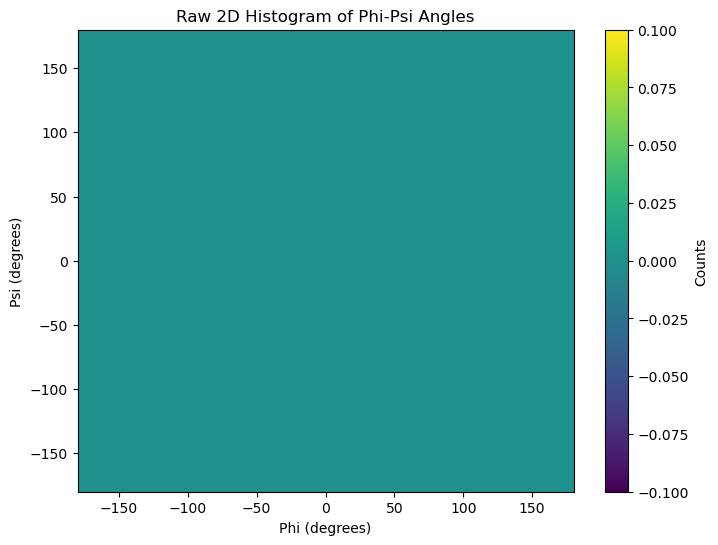

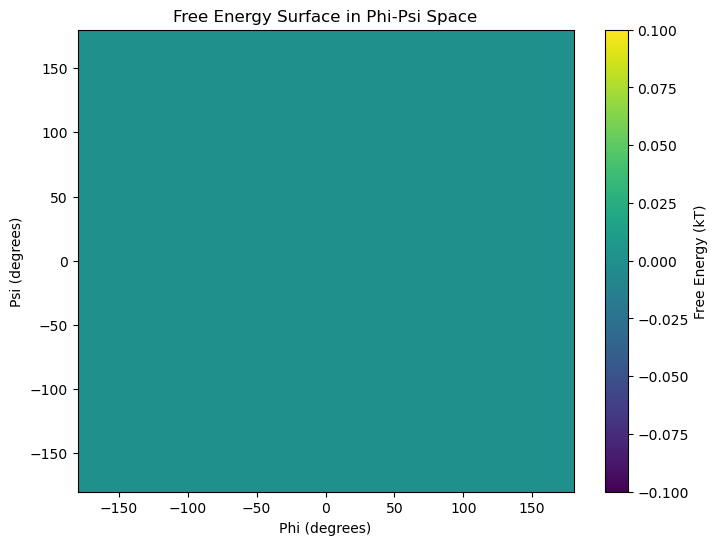

In [7]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
traj = md.load('adp.xtc', top='confout.gro')

# Compute the phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles from radians to degrees
phi_angles = np.rad2deg(phi_angles)
psi_angles = np.rad2deg(psi_angles)

# Debugging step: print min/max of angles to check range
print("Phi angle range: ", np.min(phi_angles), np.max(phi_angles))
print("Psi angle range: ", np.min(psi_angles), np.max(psi_angles))

# 2D Histogram (free energy surface)
H, xedges, yedges = np.histogram2d(phi_angles[:, 0], psi_angles[:, 0], bins=25, range=[[-180, 180], [-180, 180]])

# Plot the raw 2D histogram (before free energy calculation)
plt.figure(figsize=(8, 6))
plt.imshow(H.T, origin='lower', extent=[-180, 180, -180, 180], cmap='viridis', aspect='auto')
plt.title('Raw 2D Histogram of Phi-Psi Angles')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.colorbar(label='Counts')
plt.show()

# Compute free energy using F(phi, psi) = -log(histogram)
F = -np.log(H + 1e-8)  # Add small constant to avoid log(0)
F -= np.min(F)  # Normalize F so that the minimum value is 0 (F(phi, psi) - min(F(phi, psi)))

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.imshow(F.T, origin='lower', extent=[-180, 180, -180, 180], cmap='viridis', aspect='auto')

# Add labels and colorbar
plt.title('Free Energy Surface in Phi-Psi Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.colorbar(label='Free Energy (kT)')
plt.grid(False)
plt.show()

